In [1]:
import ipyleaflet

In [2]:
import pandas as pd

In [15]:
import geopandas as gpd

In [3]:
path_inventario = '../LHC_Hidroweb/invent2.csv'

In [4]:
df = pd.read_csv(path_inventario, engine='python', sep='\t', delimiter=';')

In [20]:
df.columns

Index(['RegistroID', 'Importado', 'Temporario', 'Removido',
       'ImportadoRepetido', 'BaciaCodigo', 'SubBaciaCodigo', 'RioCodigo',
       'EstadoCodigo', 'MunicipioCodigo', 'ResponsavelCodigo',
       'ResponsavelUnidade', 'ResponsavelJurisdicao', 'OperadoraCodigo',
       'OperadoraUnidade', 'OperadoraSubUnidade', 'TipoEstacao', 'Codigo',
       'Nome', 'CodigoAdicional', 'Latitude', 'Longitude', 'Altitude',
       'AreaDrenagem', 'TipoEstacaoEscala', 'TipoEstacaoRegistradorNivel',
       'TipoEstacaoDescLiquida', 'TipoEstacaoSedimentos',
       'TipoEstacaoQualAgua', 'TipoEstacaoPluviometro',
       'TipoEstacaoRegistradorChuva', 'TipoEstacaoTanqueEvapo',
       'TipoEstacaoClimatologica', 'TipoEstacaoPiezometria',
       'TipoEstacaoTelemetrica', 'PeriodoEscalaInicio', 'PeriodoEscalaFim',
       'PeriodoRegistradorNivelInicio', 'PeriodoRegistradorNivelFim',
       'PeriodoDescLiquidaInicio', 'PeriodoDescLiquidaFim',
       'PeriodoSedimentosInicio', 'PeriodoSedimentosFim',
      

In [5]:
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].apply(lambda x: x.str.replace(',', '.'))

In [6]:
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

In [7]:
m = ipyleaflet.Map(zoom=2)
heatmap = ipyleaflet.Heatmap(locations=[tuple(r) for r in df[['Latitude', 'Longitude']].to_numpy()],
                  radius=30, name='Heatmap')
m.add_layer(heatmap)

# Controle LAYERS
control = ipyleaflet.LayersControl(position='topright')
m.add_control(control)

# Controle ESCALA
m.add_control(ipyleaflet.ScaleControl(position='bottomleft'))

# Controle FULLSCREEN
m.add_control(ipyleaflet.FullScreenControl())

# Controle MEDIÇÃO
measure = ipyleaflet.MeasureControl(position='bottomleft',
                                    active_color='orange',
                                    primary_length_unit='kilometers')
m.add_control(measure)
measure.complete_color = 'red'

# Controle DESENHO
draw_control = ipyleaflet.DrawControl()
feature_collection = {
    'type': 'FeatureCollection',
    'features': []
}
def handle_draw(self, action, geo_json):
    """Do something with the GeoJSON when it's drawn on the map"""   
    feature_collection['features'].append(geo_json)
    
draw_control.on_draw(handle_draw)
    
m.add_control(draw_control)


In [8]:
m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [99]:
a = feature_collection['features'][-1]['geometry']
a

{'type': 'Polygon',
 'coordinates': [[[-47.768555, -20.797201],
   [-48.999023, -21.841105],
   [-47.988281, -22.978624],
   [-45.483398, -21.841105],
   [-45.681152, -21.063997],
   [-47.768555, -20.797201]]]}

In [100]:
for i in feature_collection['features']:
    print(i)

{'type': 'Feature', 'properties': {'style': {'stroke': True, 'color': '#3388ff', 'weight': 4, 'opacity': 0.5, 'fill': True, 'fillColor': None, 'fillOpacity': 0.2, 'clickable': True}}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-50.976563, -6.664608], [-40.078125, -22.917923], [-10.898438, -3.864255], [-25.664063, 9.449062], [-50.976563, -6.664608]]]}}
{'type': 'Feature', 'properties': {'style': {'stroke': True, 'color': '#3388ff', 'weight': 4, 'opacity': 0.5, 'fill': True, 'fillColor': None, 'fillOpacity': 0.2, 'clickable': True}}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-23.554687, -28.613459], [6.679688, -15.961329], [7.734375, -38.272689], [-23.90625, -37.996163], [-23.554687, -28.613459]]]}}
{'type': 'Feature', 'properties': {'style': {'stroke': True, 'color': '#3388ff', 'weight': 4, 'opacity': 0.5, 'fill': True, 'fillColor': None, 'fillOpacity': 0.2, 'clickable': True}}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-50.976563, -6.664608], [-40.078125, -22.917

In [101]:
teste = gpd.read_file(path_inventario)

In [102]:
teste.columns

Index(['RegistroID', 'Importado', 'Temporario', 'Removido',
       'ImportadoRepetido', 'BaciaCodigo', 'SubBaciaCodigo', 'RioCodigo',
       'EstadoCodigo', 'MunicipioCodigo', 'ResponsavelCodigo',
       'ResponsavelUnidade', 'ResponsavelJurisdicao', 'OperadoraCodigo',
       'OperadoraUnidade', 'OperadoraSubUnidade', 'TipoEstacao', 'Codigo',
       'Nome', 'CodigoAdicional', 'Latitude', 'Longitude', 'Altitude',
       'AreaDrenagem', 'TipoEstacaoEscala', 'TipoEstacaoRegistradorNivel',
       'TipoEstacaoDescLiquida', 'TipoEstacaoSedimentos',
       'TipoEstacaoQualAgua', 'TipoEstacaoPluviometro',
       'TipoEstacaoRegistradorChuva', 'TipoEstacaoTanqueEvapo',
       'TipoEstacaoClimatologica', 'TipoEstacaoPiezometria',
       'TipoEstacaoTelemetrica', 'PeriodoEscalaInicio', 'PeriodoEscalaFim',
       'PeriodoRegistradorNivelInicio', 'PeriodoRegistradorNivelFim',
       'PeriodoDescLiquidaInicio', 'PeriodoDescLiquidaFim',
       'PeriodoSedimentosInicio', 'PeriodoSedimentosFim',
      

In [103]:
teste[['Latitude', 'Longitude']]= teste[['Latitude', 'Longitude']].apply(lambda x: x.str.replace(',', '.'))

In [104]:
teste['Latitude'] = teste['Latitude'].astype('float')
teste['Longitude'] = teste['Longitude'].astype('float')

In [105]:
gdf = gpd.GeoDataFrame(teste, geometry=gpd.points_from_xy(teste.Longitude, teste.Latitude))

In [106]:
from shapely.geometry import Polygon, Point

In [107]:
for i in a['coordinates'][0]:
    print(i[0])

-47.768555
-48.999023
-47.988281
-45.483398
-45.681152
-47.768555


In [108]:
points = [Point(i[0],i[1]) for i in a['coordinates'][0]]

In [109]:
poly = Polygon([(p.x, p.y) for p in points])

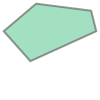

In [110]:
poly

In [111]:
poly_bool = gdf['geometry'].within(poly)

In [112]:
gdf.loc[gdf['geometry'].within(poly), ['Nome', 'Codigo']]

,Nome,Codigo
557,JACUTINGA,2246052
593,JACUTINGA,61865000
956,CACHOEIRA DE BAIXO,2246010
966,ITAQUI,2246005
1017,AMÉRICO BRASILIENSE,2148035
...,...,...
35756,PCH RIO DO PEIXE BARRAMENTO,61816200
35757,PCH RIO DO PEIXE BARRAMENTO,2146113
36021,POÇOS DE CALDAS,2146048
36037,MACHADO,2145033


In [113]:
poly2 = Polygon([(i[0], i[1]) for i in a['coordinates'][0]])

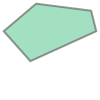

In [114]:
poly2

In [14]:
split_m = ipyleaflet.Map(zoom=2)

right_layer = ipyleaflet.Heatmap(locations=[tuple(r) for r in df[['Latitude', 'Longitude']].to_numpy()],
                  radius=30, name='Heatmap')
left_layer =  ipyleaflet.basemap_to_tiles(ipyleaflet.basemaps.NASAGIBS.ModisTerraTrueColorCR, "2020-01-30")

control = ipyleaflet.SplitMapControl(left_layer=left_layer, right_layer=right_layer)
split_m.add_control(control)
split_m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…